# Deep Learning Final Project

## Fake face detection:

In [1]:
#!pip install opencv-contrib-python

In [2]:
# !pip install --upgrade tensorflow.keras

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import split_folders
import numpy as np
import cv2
import os
# from keras.applications.mobilenet_v2 import MobileNetV2

In [4]:
print(os.listdir("/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection"))

['.DS_Store', 'real-and-fake-face-detection']


In [5]:
real = "/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real-and-fake-face-detection/real_and_fake_face/training_real/"
fake = "/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real-and-fake-face-detection/real_and_fake_face/training_fake/"
real_path = os.listdir(real)
fake_path = os.listdir(fake)

In [6]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (224, 224))
    return image[...,::-1]

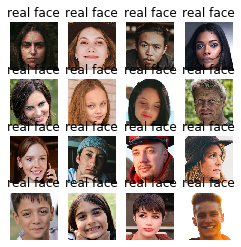

In [7]:
fig = plt.figure(figsize=(4, 4))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(real + real_path[i]), cmap='gray')
    plt.title("real face")
    plt.axis('off')

plt.show()

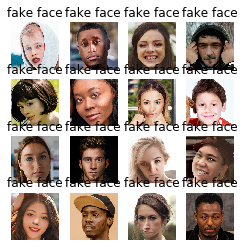

In [8]:
fig = plt.figure(figsize=(4, 4))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(fake + fake_path[i]), cmap='gray')
    plt.title("fake face")
    plt.axis('off')

plt.show()

In [9]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip=False,
                                   rescale=1./255,
                                   )

In [10]:
dataset_path = "/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real-and-fake-face-detection/real_and_fake_face_detection/real_and_fake_face"

In [11]:
train = train_datagen.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(96, 96),
                                          batch_size=32)

Found 2041 images belonging to 2 classes.


In [12]:
mobilenetV2 = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')

average_layer = GlobalAveragePooling2D()

model2 = Sequential([mobilenetV2,
                     average_layer,
                     Dense(256, activation=tf.nn.relu),
                     BatchNormalization(),
                     Dropout(0.2),
                     Dense(2, activation=tf.nn.softmax)
                    ])

In [13]:
model2.compile(optimizer=Adam(lr=0.001),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [14]:
def scheduler(epoch):
    if epoch <= 2:
        return 0.001
    elif epoch > 2 and epoch <= 15:
        return 0.0001 
    else:
        return 0.00001

lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)

---------------------

In [14]:
from tensorflow.keras.models import Sequential
model2.fit_generator(train,
                     epochs=50,
                     callbacks=[lr_callbacks])

Epoch 1/50
64/64 [==============================] - 56s 869ms/step - loss: 1.1032 - accuracy: 0.5532
Epoch 2/50
64/64 [==============================] - 55s 856ms/step - loss: 0.6624 - accuracy: 0.6585
Epoch 3/50
64/64 [==============================] - 55s 857ms/step - loss: 0.5962 - accuracy: 0.7060
Epoch 4/50
64/64 [==============================] - 55s 857ms/step - loss: 0.4515 - accuracy: 0.7976
Epoch 5/50
64/64 [==============================] - 55s 858ms/step - loss: 0.3675 - accuracy: 0.8403
Epoch 6/50
64/64 [==============================] - 55s 856ms/step - loss: 0.3264 - accuracy: 0.8599
Epoch 7/50
64/64 [==============================] - 55s 861ms/step - loss: 0.2818 - accuracy: 0.8834
Epoch 8/50
64/64 [==============================] - 55s 864ms/step - loss: 0.2175 - accuracy: 0.9221
Epoch 9/50
64/64 [==============================] - 55s 855ms/step - loss: 0.1856 - accuracy: 0.9270
Epoch 10/50
64/64 [==============================] - 55s 854ms/step - loss: 0.1480 - accura

In [15]:
model2.evaluate_generator(train)

[0.0014711155572513235, 1.0]

In [16]:
model2.save("model2.h5")

-----------------

In [14]:
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

In [21]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')

In [22]:
img0 = cv2.imread('/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real-and-fake-face-detection/real_and_fake_face_detection/real_and_fake_face/training_fake/easy_5_1100.jpg')
img0 = cv2.resize(img0, (96, 96))
print(img0.shape)

(96, 96, 3)


In [23]:
img0=tf.image.convert_image_dtype(img0,tf.float32)
img0 = np.reshape(img0, [1, 96, 96, 3])
print(np.argmax(model.predict(img0)))

1


In [46]:
img02 = cv2.imread('/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real-and-fake-face-detection/real_and_fake_face_detection/real_and_fake_face/training_fake/mid_128_1110.jpg')
img02 = cv2.resize(img02, (96, 96))
print(img02.shape)

(96, 96, 3)


In [47]:
img02=tf.image.convert_image_dtype(img02,tf.float32)
img02 = np.reshape(img02, [1, 96, 96, 3])
print(np.argmax(model.predict(img02)))

1


In [48]:
img03 = cv2.imread('/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real-and-fake-face-detection/real_and_fake_face_detection/real_and_fake_face/training_fake/hard_192_1111.jpg')
img03 = cv2.resize(img03, (96, 96))
print(img03.shape)

(96, 96, 3)


In [49]:
img03=tf.image.convert_image_dtype(img03,tf.float32)
img03 = np.reshape(img03, [1, 96, 96, 3])
print(np.argmax(model.predict(img03)))

1


In [50]:
img04 = cv2.imread('/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real-and-fake-face-detection/real_and_fake_face_detection/real_and_fake_face/training_real/real_00014.jpg')
img04 = cv2.resize(img04, (96, 96))
print(img04.shape)

(96, 96, 3)


In [51]:
img04 =tf.image.convert_image_dtype(img04,tf.float32)
img04 = np.reshape(img04, [1, 96, 96, 3])
print(np.argmax(model.predict(img04)))

0


In [52]:
img05 = cv2.imread('/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real-and-fake-face-detection/real_and_fake_face_detection/real_and_fake_face/training_real/real_00059.jpg')
img05 = cv2.resize(img05, (96, 96))
print(img05.shape)

(96, 96, 3)


In [53]:
img05=tf.image.convert_image_dtype(img05,tf.float32)
img05 = np.reshape(img05, [1, 96, 96, 3])
print(np.argmax(model.predict(img05)))

1


In [54]:
img06 = cv2.imread('/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real-and-fake-face-detection/real_and_fake_face_detection/real_and_fake_face/training_real/real_00089.jpg')
img06 = cv2.resize(img06, (96, 96))
print(img06.shape)

(96, 96, 3)


In [55]:
img06=tf.image.convert_image_dtype(img06,tf.float32)
img06 = np.reshape(img06, [1, 96, 96, 3])
print(np.argmax(model.predict(img06)))

0


In [56]:
img07 = cv2.imread('/Users/zhongyizhang/Desktop/Nature1.jpeg')
img07 = cv2.resize(img07, (96, 96))
print(img07.shape)

(96, 96, 3)


In [57]:
img07=tf.image.convert_image_dtype(img07,tf.float32)
img07 = np.reshape(img07, [1, 96, 96, 3])
print(np.argmax(model.predict(img07)))

0


In [20]:
# me = tf.image.decode_jpeg('Nature1.jpeg')
# me = tf.cast(me, tf.float64)

In [ ]:
# me = np.reshape(me, [1, 96, 96, 3])
# print(np.argmax(model2.predict(me)))

In [58]:
img1 = cv2.imread('/Users/zhongyizhang/Desktop/ZhongyiZhang.jpg')
img1 = cv2.resize(img1, (96, 96))
print(img1.shape)

(96, 96, 3)


In [59]:
# img1 = tf.image.decode_jpeg('/Users/zhongyizhang/Desktop/ZhongyiZhang.jpg')
# img1 = tf.cast(img1, tf.float32)
img1=tf.image.convert_image_dtype(img1,tf.float32)

In [60]:
# img = cv2.resize(img, (96, 96))
img1 = np.reshape(img1, [1, 96, 96, 3])
print(np.argmax(model.predict(img1)))

0


In [61]:
img2 = cv2.imread('/Users/zhongyizhang/Desktop/ZhongyiZhang_old.jpg')
img2 = cv2.resize(img2, (96, 96))
img2=tf.image.convert_image_dtype(img2,tf.float32)

In [62]:
img2 = np.reshape(img2, [1, 96, 96, 3])
print(np.argmax(model.predict(img2)))

0


In [63]:
img3 = cv2.imread('/Users/zhongyizhang/Desktop/Nature1.jpeg')
img3 = cv2.resize(img3, (96, 96))
img3=tf.image.convert_image_dtype(img3,tf.float32)
img3 = np.reshape(img3, [1, 96, 96, 3])
print(np.argmax(model.predict(img3)))

0


In [114]:
img2 = cv2.imread('/Users/zhongyizhang/Desktop/ZhongyiZhang_old.jpg')
img2 = cv2.resize(img2, (96, 96))
print(img2.shape)

(96, 96, 3)


In [115]:
img2 = np.reshape(img2, [1, 96, 96, 3])
print(np.argmax(model.predict(img2)))

1


In [117]:
img3 = cv2.imread('/Users/zhongyizhang/Desktop/Nature1.jpeg')
img3 = cv2.resize(img3, (96, 96))
print(img3.shape)

(96, 96, 3)


In [118]:
# img = cv2.resize(img, (96, 96))
img3 = np.reshape(img3, [1, 96, 96, 3])
print(np.argmax(model.predict(img3)))

0


## Facial features detection

In [88]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real_and_fake_face_detection/real_and_fake_face/'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass

In [89]:
import subprocess
import sys

try:
    import dlib
except:
    subprocess.call([sys.executable, "-m", "pip", "install", 'dlib'])
    import dlib
import os
import cv2

In [90]:
import cv2
import matplotlib.pyplot as plt

fakeDir='/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real_and_fake_face_detection/real_and_fake_face/training_fake/'
realDir='/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real_and_fake_face_detection/real_and_fake_face/training_real/'

In [91]:
real_path2 = os.listdir(realDir)
fake_path2 = os.listdir(fakeDir)

In [92]:
# https://www.kaggle.com/crazyt/shape-predictor-68-face-landmarks
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/shape-predictor-68-face-landmarks/shape_predictor_68_face_landmarks.dat')

In [93]:
import matplotlib.pyplot as plt
from PIL import Image

fakeImgList=os.listdir('/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real_and_fake_face_detection/real_and_fake_face/training_fake/')
realImgList=os.listdir('/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real_and_fake_face_detection/real_and_fake_face/training_real/')

def genResult(fileList):
    nameDict={}
    for nameString in fileList:
        temp=nameString.split('.')[0]
        infoList=temp.split('_')
        lvl=infoList[0]
        filNum=infoList[1]
        rgs=[int(x) for x in str(infoList[2])]
        nameDict[nameString]=[lvl,filNum,rgs]
    return nameDict

def genOrigin(fileList):
    nameDict={}
    for nmStr in fileList:
        nameDict[int(nmStr.split('.')[0].split('_')[1])]=nmStr
    return nameDict

fakeDictionary=genResult(fakeImgList)
realDictionary=genOrigin(realImgList)

In [94]:
def oneImgPipeline(imgIdx):
    fakeImgName=fakeImgList[imgIdx]

    metaInfo=fakeDictionary[fakeImgName]
    realImgName=realDictionary[int(metaInfo[1])]

    img = cv2.imread(fakeDir+fakeImgName, 1)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces_in_image = detector(img_gray, 0)
    
    if len(faces_in_image)!=1:
        return 
    
    for face in faces_in_image:
        landmarks = predictor(img_gray, face)
        landmarks_list = []
        for i in range(0, landmarks.num_parts):
            landmarks_list.append((landmarks.part(i).x, landmarks.part(i).y))

    xaxis=[x[0] for x in landmarks_list]
    yaxis=[x[1] for x in landmarks_list]
    img = Image.open(fakeDir+fakeImgName)
    img.load()
    
    data = np.asarray(img, dtype="int32" )
    
    fakeImg = Image.open(fakeDir+fakeImgName)
    fakeImg.load()
    
    dataFake = np.asarray(fakeImg, dtype="int32" )
        
    fig = plt.figure(figsize=(100, 40))
    ax1 = fig.add_subplot(1,3,1)
    ax1.imshow(img)
    
    def maskRightEye(xlst,ylst):
        hotXs=xlst[36:42]
        hotYs=ylst[36:42]
        minX=min(hotXs)
        maxX=max(hotXs)

        minY=min(hotYs)
        maxY=max(hotYs)

        leftX=max(0,minX-(maxX-minX)/2)
        rightX=min(data.shape[1],maxX+(maxX-minX)/2+1)

        botY=min(data.shape[0],maxY+maxY-minY+1)
        topY=max(0,minY-maxY+minY)

        boxXLst=[leftX,rightX,rightX,leftX,leftX]
        boxYLst=[topY,topY,botY,botY,topY]
        ax1.plot(boxXLst,boxYLst,linewidth=10.0)
        return int(leftX),int(rightX),int(topY),int(botY)
        
    def maskLeftEye(xlst,ylst):
        hotXs=xlst[42:48]
        hotYs=ylst[42:48]
        minX=min(hotXs)
        maxX=max(hotXs)

        minY=min(hotYs)
        maxY=max(hotYs)

        leftX=max(0,minX-(maxX-minX)/2)
        rightX=min(data.shape[1],maxX+(maxX-minX)/2+1)

        botY=min(data.shape[0],maxY+maxY-minY+1)
        topY=max(0,minY-maxY+minY)
        
        boxXLst=[leftX,rightX,rightX,leftX,leftX]
        boxYLst=[topY,topY,botY,botY,topY]
        ax1.plot(boxXLst,boxYLst,linewidth=10.0)
        return int(leftX),int(rightX),int(topY),int(botY)
    
    def maskNose(xlst,ylst):
        hotXs=xlst[27:36]
        hotYs=ylst[27:36]
        minX=min(hotXs)
        maxX=max(hotXs)

        minY=min(hotYs)
        maxY=max(hotYs)

        leftX=max(0,minX-(maxX-minX)/5)
        rightX=min(data.shape[1],maxX+(maxX-minX)/5+1)

        botY=min(data.shape[0],maxY+(maxY-minY)/10+1)
        topY=max(0,minY-(maxY-minY)/10)

        boxXLst=[leftX,rightX,rightX,leftX,leftX]
        boxYLst=[topY,topY,botY,botY,topY]
        ax1.plot(boxXLst,boxYLst,linewidth=10.0)
        return int(leftX),int(rightX),int(topY),int(botY)
    def maskMouth(xlst,ylst):
        hotXs=xlst[48:68]
        hotYs=ylst[48:68]
        minX=min(hotXs)
        maxX=max(hotXs)

        minY=min(hotYs)
        maxY=max(hotYs)

        leftX=max(0,minX-(maxX-minX)/10)
        rightX=min(data.shape[1],maxX+(maxX-minX)/10+1)

        botY=min(data.shape[0],maxY+(maxY-minY)/10+1)
        topY=max(0,minY-(maxY-minY)/10)

        boxXLst=[leftX,rightX,rightX,leftX,leftX]
        boxYLst=[topY,topY,botY,botY,topY]
        ax1.plot(boxXLst,boxYLst,linewidth=10.0)
        return int(leftX),int(rightX),int(topY),int(botY)
    
    rightEyeInfo=maskRightEye(xaxis,yaxis)
    leftEyeInfo=maskLeftEye(xaxis,yaxis)
    noseInfo=maskNose(xaxis,yaxis)
    mouthInfo=maskMouth(xaxis,yaxis)
    
    reconShape=data.shape
    level=metaInfo[0]
    base=np.zeros(reconShape)
    fillVal=0
    
    if metaInfo[0]=='easy':
        fillVal=85.0
    elif metaInfo[0]=='mid':
        fillVal=170.0
    elif metaInfo[0]=='hard':
        fillVal=255.0
    if int(metaInfo[2][0])==1:
        for x in range(rightEyeInfo[0],rightEyeInfo[1]):
            for y in range(rightEyeInfo[2],rightEyeInfo[3]):
                base[y][x]=fillVal
    if int(metaInfo[2][1])==1:
        for x in range(leftEyeInfo[0],leftEyeInfo[1]):
            for y in range(leftEyeInfo[2],leftEyeInfo[3]):
                base[y][x]=fillVal
    if int(metaInfo[2][2])==1:
        for x in range(noseInfo[0],noseInfo[1]):
            for y in range(noseInfo[2],noseInfo[3]):
                base[y][x]=fillVal
    if int(metaInfo[2][3])==1:
        for x in range(mouthInfo[0],mouthInfo[1]):
            for y in range(mouthInfo[2],mouthInfo[3]):
                base[y][x]=fillVal
    ax2 = fig.add_subplot(1,3,2)
    ax2.imshow(base/255.0)
    ax3 = fig.add_subplot(1,3,3)
    ax3.imshow(data)

    return metaInfo

In [95]:
# img000 = cv2.imread('/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real_and_fake_face_detection/real_and_fake_face/training_fake_me/mid_001_0001.jpeg')
# img001 = cv2.imread('/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real_and_fake_face_detection/real_and_fake_face/training_fake_me/mid_001_0002.jpg')
# img002 = cv2.imread('/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real_and_fake_face_detection/real_and_fake_face/training_fake_me/mid_001_0003.jpg')
# img000 = cv2.resize(img000, (600, 600))
# img001 = cv2.resize(img001, (600, 600))
# img002 = cv2.resize(img002, (600, 600))
# print(img000.shape,img001.shape,img002.shape)





In [99]:
fakeImgList2=os.listdir('/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real_and_fake_face_detection/training_fake_me/')
fakeDictionary2=genResult(fakeImgList2)

In [100]:
fakeImgList2=os.listdir('/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real_and_fake_face_detection/training_fake_me/')
fakeDictionary2=genResult(fakeImgList2)
fakeDir='/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real_and_fake_face_detection/training_fake_me/'

def oneImgPipeline2(imgIdx):
    fakeImgName=fakeImgList2[imgIdx]

    metaInfo=fakeDictionary2[fakeImgName]
    realImgName=realDictionary[int(metaInfo[1])]

    img = cv2.imread(fakeDir+fakeImgName, 1)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces_in_image = detector(img_gray, 0)
    
    if len(faces_in_image)!=1:
        return 
    
    for face in faces_in_image:
        landmarks = predictor(img_gray, face)
        landmarks_list = []
        for i in range(0, landmarks.num_parts):
            landmarks_list.append((landmarks.part(i).x, landmarks.part(i).y))

    xaxis=[x[0] for x in landmarks_list]
    yaxis=[x[1] for x in landmarks_list]
    img = Image.open(fakeDir+fakeImgName)
    img.load()
    
    data = np.asarray(img, dtype="int32" )
    
    fakeImg = Image.open(fakeDir+fakeImgName)
    fakeImg.load()
    
    dataFake = np.asarray(fakeImg, dtype="int32" )
        
    fig = plt.figure(figsize=(100, 40))
    ax1 = fig.add_subplot(1,3,1)
    ax1.imshow(img)
    
    def maskRightEye(xlst,ylst):
        hotXs=xlst[36:42]
        hotYs=ylst[36:42]
        minX=min(hotXs)
        maxX=max(hotXs)

        minY=min(hotYs)
        maxY=max(hotYs)

        leftX=max(0,minX-(maxX-minX)/2)
        rightX=min(data.shape[1],maxX+(maxX-minX)/2+1)

        botY=min(data.shape[0],maxY+maxY-minY+1)
        topY=max(0,minY-maxY+minY)

        boxXLst=[leftX,rightX,rightX,leftX,leftX]
        boxYLst=[topY,topY,botY,botY,topY]
        ax1.plot(boxXLst,boxYLst,linewidth=10.0)
        return int(leftX),int(rightX),int(topY),int(botY)
        
    def maskLeftEye(xlst,ylst):
        hotXs=xlst[42:48]
        hotYs=ylst[42:48]
        minX=min(hotXs)
        maxX=max(hotXs)

        minY=min(hotYs)
        maxY=max(hotYs)

        leftX=max(0,minX-(maxX-minX)/2)
        rightX=min(data.shape[1],maxX+(maxX-minX)/2+1)

        botY=min(data.shape[0],maxY+maxY-minY+1)
        topY=max(0,minY-maxY+minY)
        
        boxXLst=[leftX,rightX,rightX,leftX,leftX]
        boxYLst=[topY,topY,botY,botY,topY]
        ax1.plot(boxXLst,boxYLst,linewidth=10.0)
        return int(leftX),int(rightX),int(topY),int(botY)
    
    def maskNose(xlst,ylst):
        hotXs=xlst[27:36]
        hotYs=ylst[27:36]
        minX=min(hotXs)
        maxX=max(hotXs)

        minY=min(hotYs)
        maxY=max(hotYs)

        leftX=max(0,minX-(maxX-minX)/5)
        rightX=min(data.shape[1],maxX+(maxX-minX)/5+1)

        botY=min(data.shape[0],maxY+(maxY-minY)/10+1)
        topY=max(0,minY-(maxY-minY)/10)

        boxXLst=[leftX,rightX,rightX,leftX,leftX]
        boxYLst=[topY,topY,botY,botY,topY]
        ax1.plot(boxXLst,boxYLst,linewidth=10.0)
        return int(leftX),int(rightX),int(topY),int(botY)
    def maskMouth(xlst,ylst):
        hotXs=xlst[48:68]
        hotYs=ylst[48:68]
        minX=min(hotXs)
        maxX=max(hotXs)

        minY=min(hotYs)
        maxY=max(hotYs)

        leftX=max(0,minX-(maxX-minX)/10)
        rightX=min(data.shape[1],maxX+(maxX-minX)/10+1)

        botY=min(data.shape[0],maxY+(maxY-minY)/10+1)
        topY=max(0,minY-(maxY-minY)/10)

        boxXLst=[leftX,rightX,rightX,leftX,leftX]
        boxYLst=[topY,topY,botY,botY,topY]
        ax1.plot(boxXLst,boxYLst,linewidth=10.0)
        return int(leftX),int(rightX),int(topY),int(botY)
    
    rightEyeInfo=maskRightEye(xaxis,yaxis)
    leftEyeInfo=maskLeftEye(xaxis,yaxis)
    noseInfo=maskNose(xaxis,yaxis)
    mouthInfo=maskMouth(xaxis,yaxis)
    
    reconShape=data.shape
    level=metaInfo[0]
    base=np.zeros(reconShape)
    fillVal=0
    
    if metaInfo[0]=='easy':
        fillVal=85.0
    elif metaInfo[0]=='mid':
        fillVal=170.0
    elif metaInfo[0]=='hard':
        fillVal=255.0
    if int(metaInfo[2][0])==1:
        for x in range(rightEyeInfo[0],rightEyeInfo[1]):
            for y in range(rightEyeInfo[2],rightEyeInfo[3]):
                base[y][x]=fillVal
    if int(metaInfo[2][1])==1:
        for x in range(leftEyeInfo[0],leftEyeInfo[1]):
            for y in range(leftEyeInfo[2],leftEyeInfo[3]):
                base[y][x]=fillVal
    if int(metaInfo[2][2])==1:
        for x in range(noseInfo[0],noseInfo[1]):
            for y in range(noseInfo[2],noseInfo[3]):
                base[y][x]=fillVal
    if int(metaInfo[2][3])==1:
        for x in range(mouthInfo[0],mouthInfo[1]):
            for y in range(mouthInfo[2],mouthInfo[3]):
                base[y][x]=fillVal
    ax2 = fig.add_subplot(1,3,2)
    ax2.imshow(base/255.0)
    ax3 = fig.add_subplot(1,3,3)
    ax3.imshow(data)

    return metaInfo

['mid', '2', [1, 1, 1, 2]]

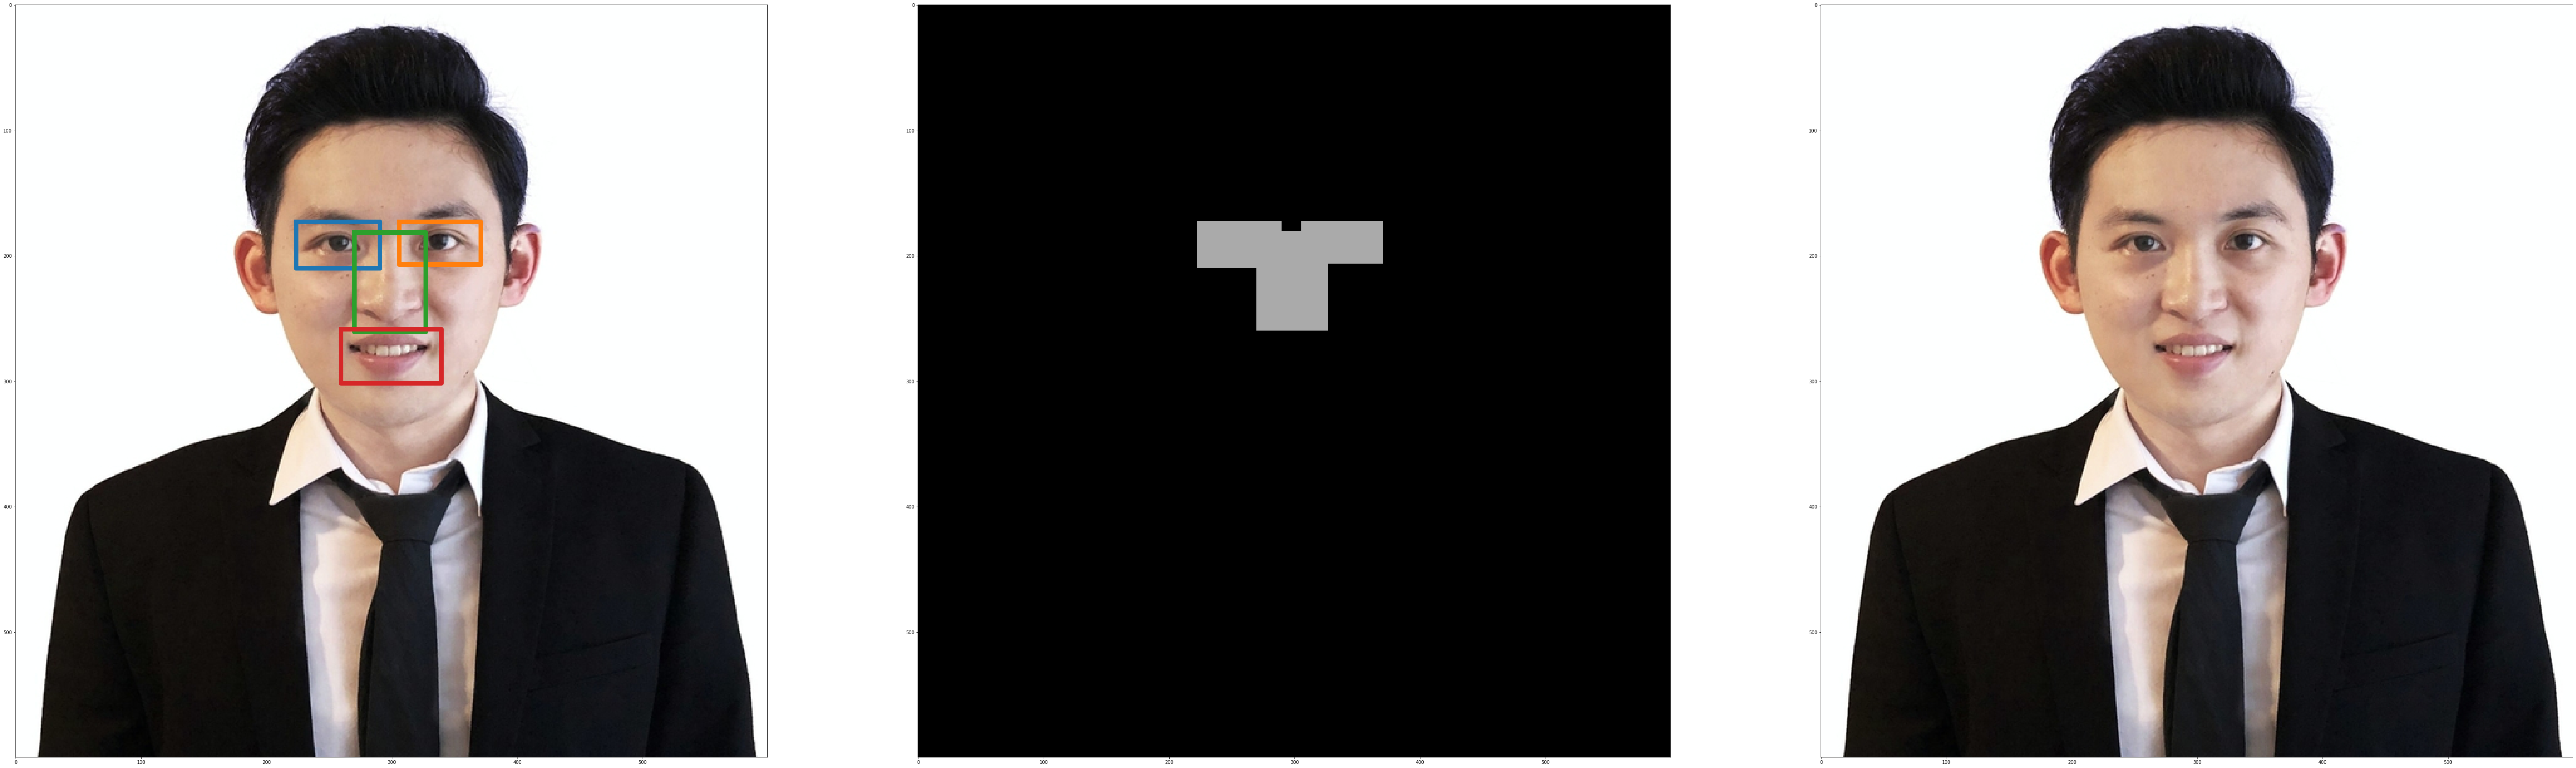

In [101]:
oneImgPipeline2(1)

['mid', '329', [1, 1, 1, 0]]

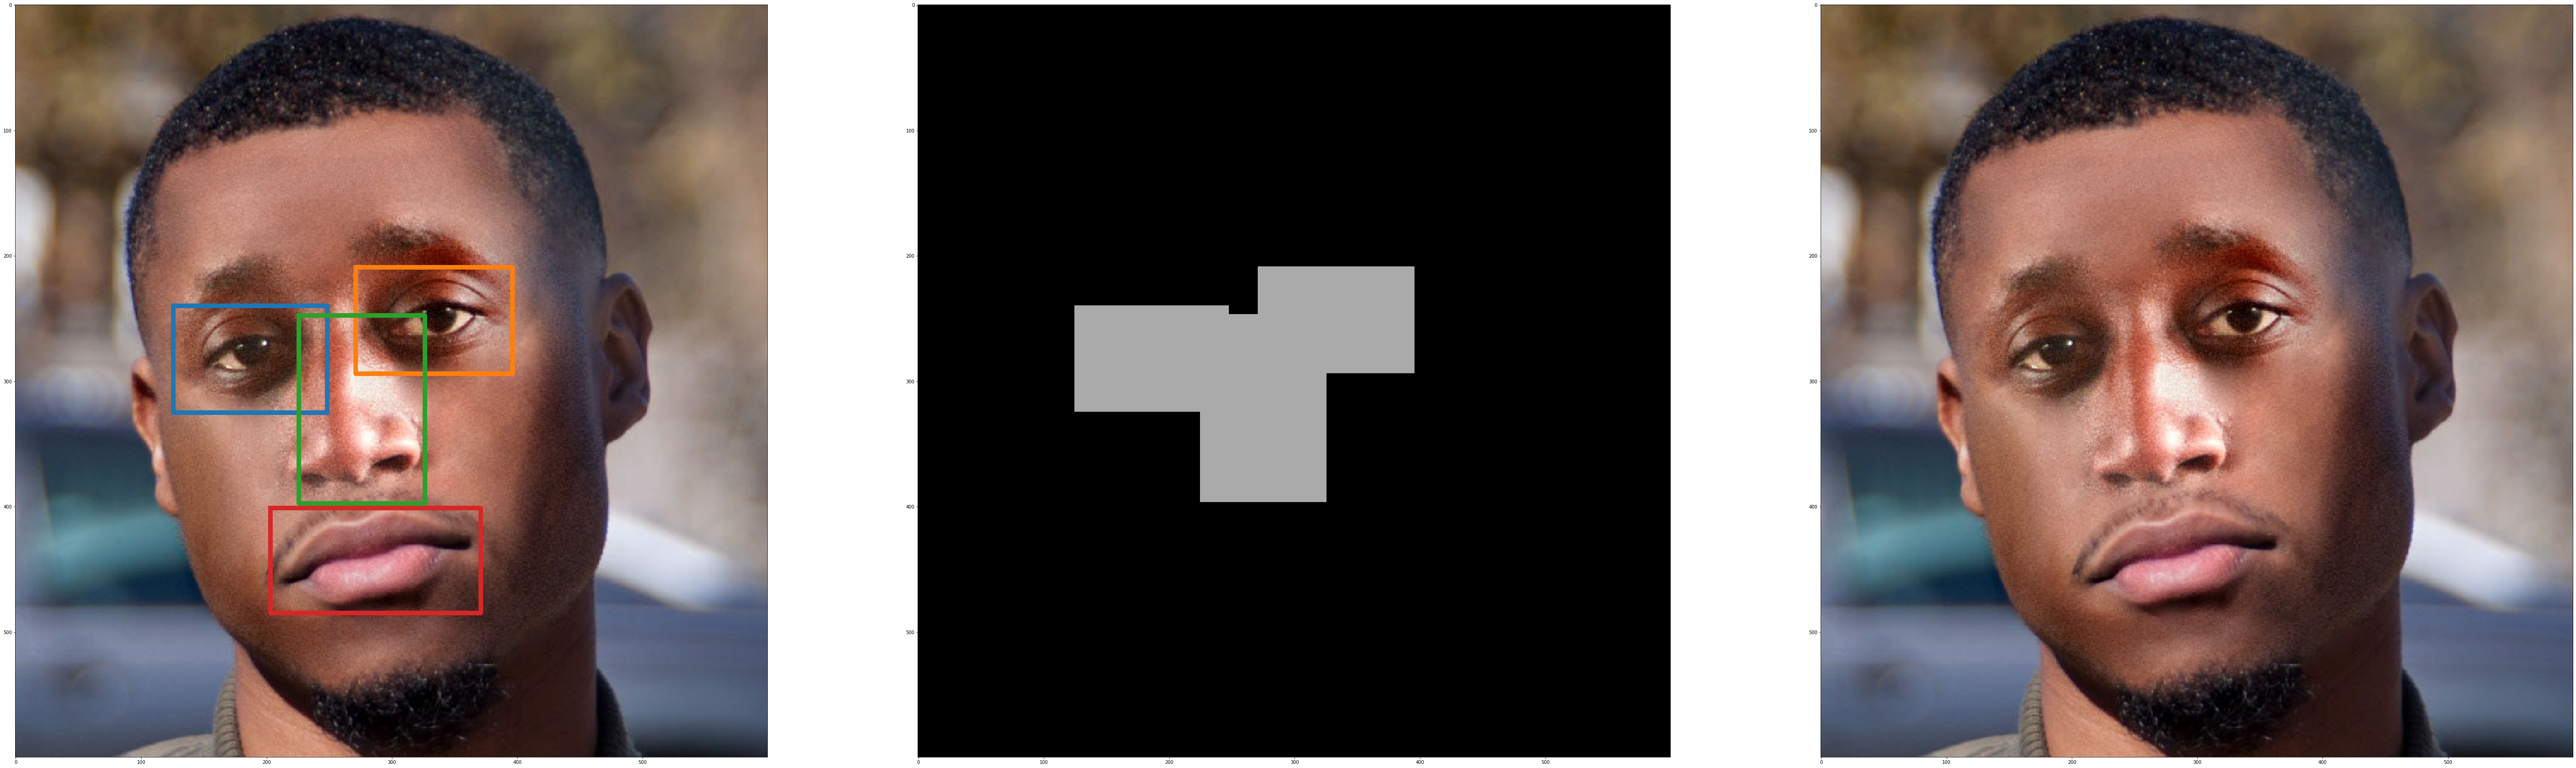

In [119]:
oneImgPipeline(1)

['mid', '63', [1, 1, 1, 1]]

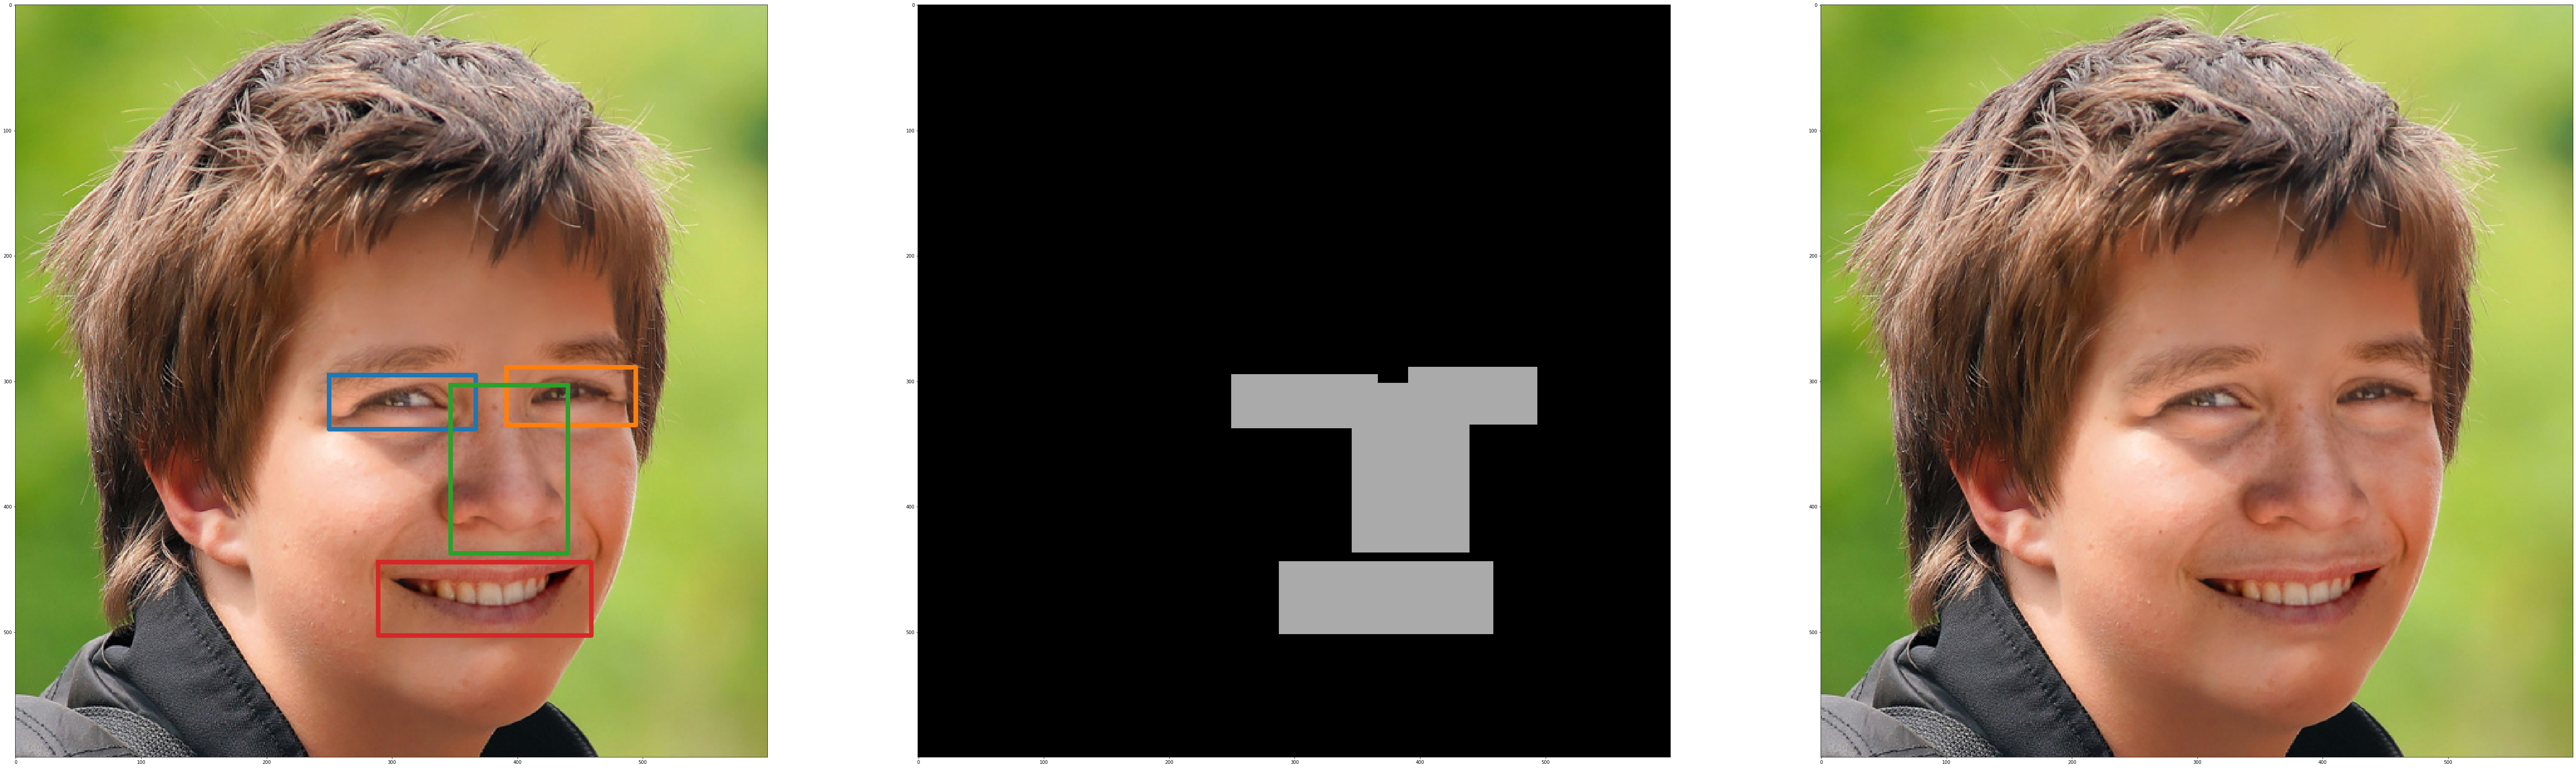

In [79]:
oneImgPipeline(197)

['hard', '97', [1, 0, 0, 1]]

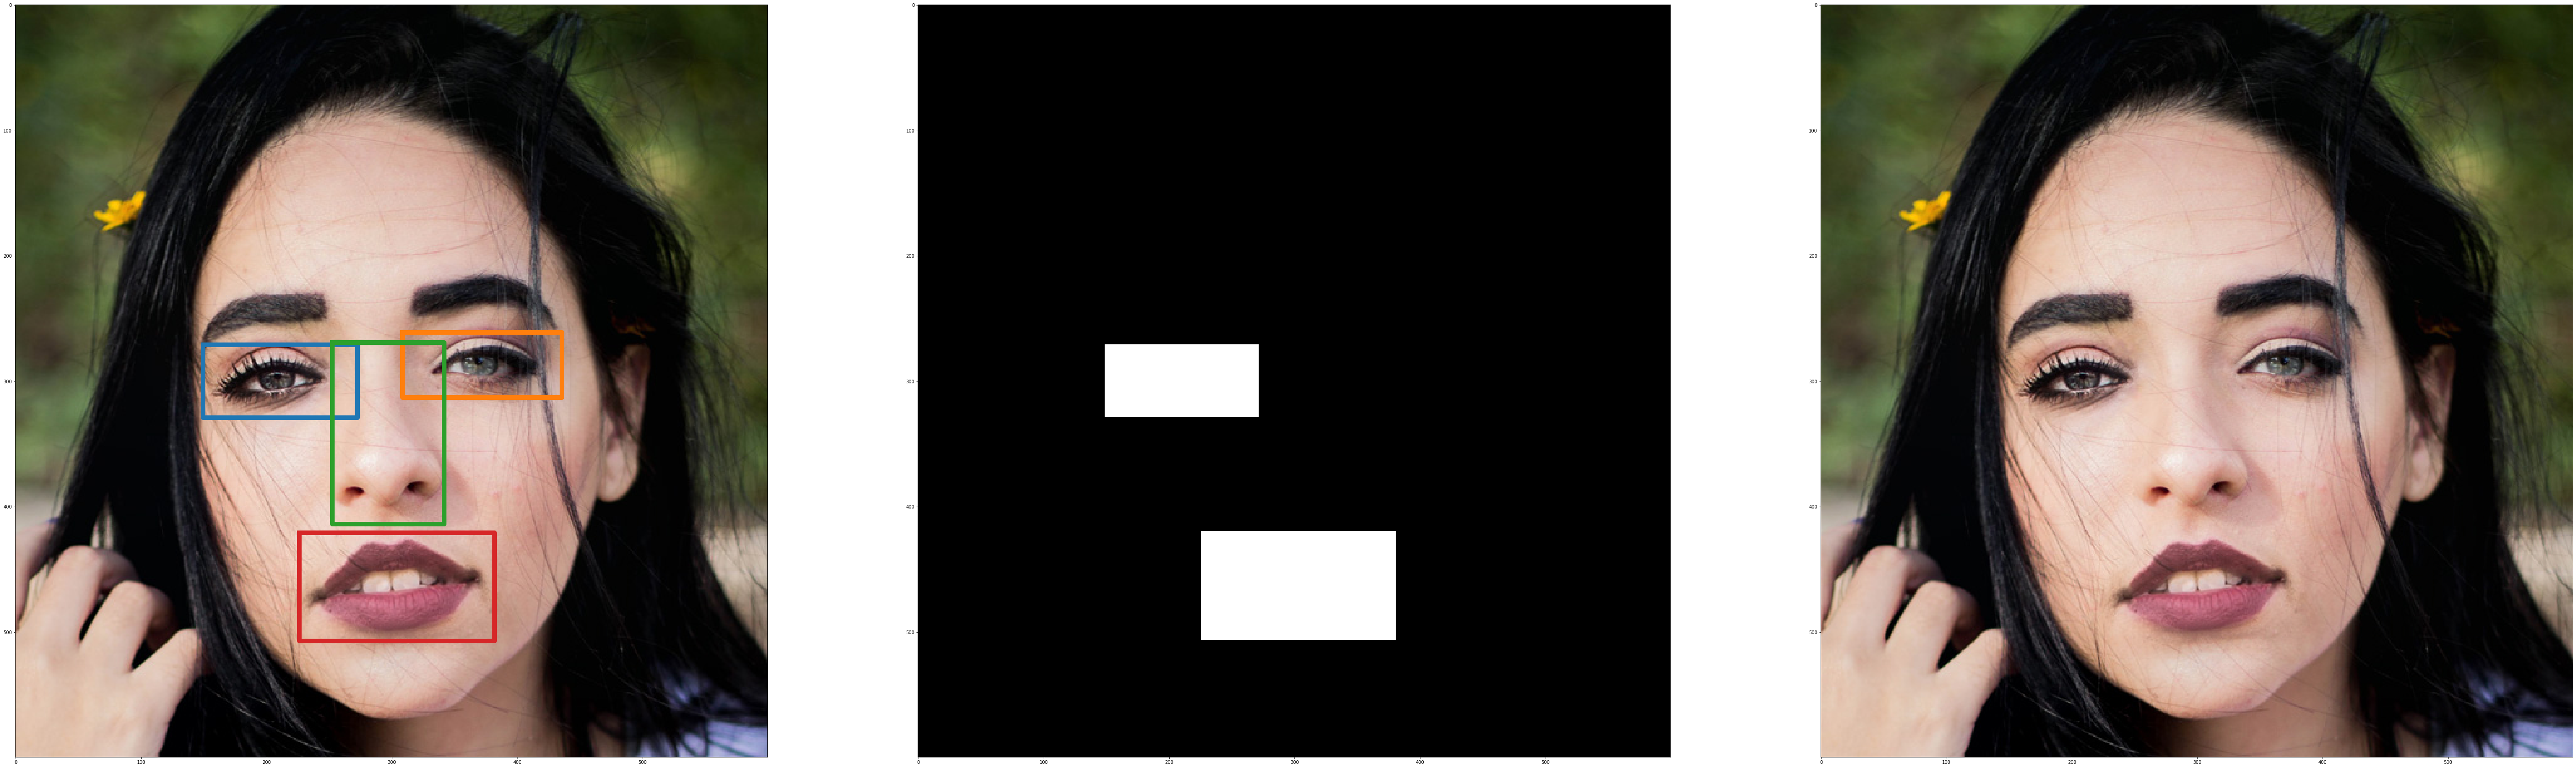

In [78]:
oneImgPipeline(198)

['mid', '317', [1, 1, 0, 1]]

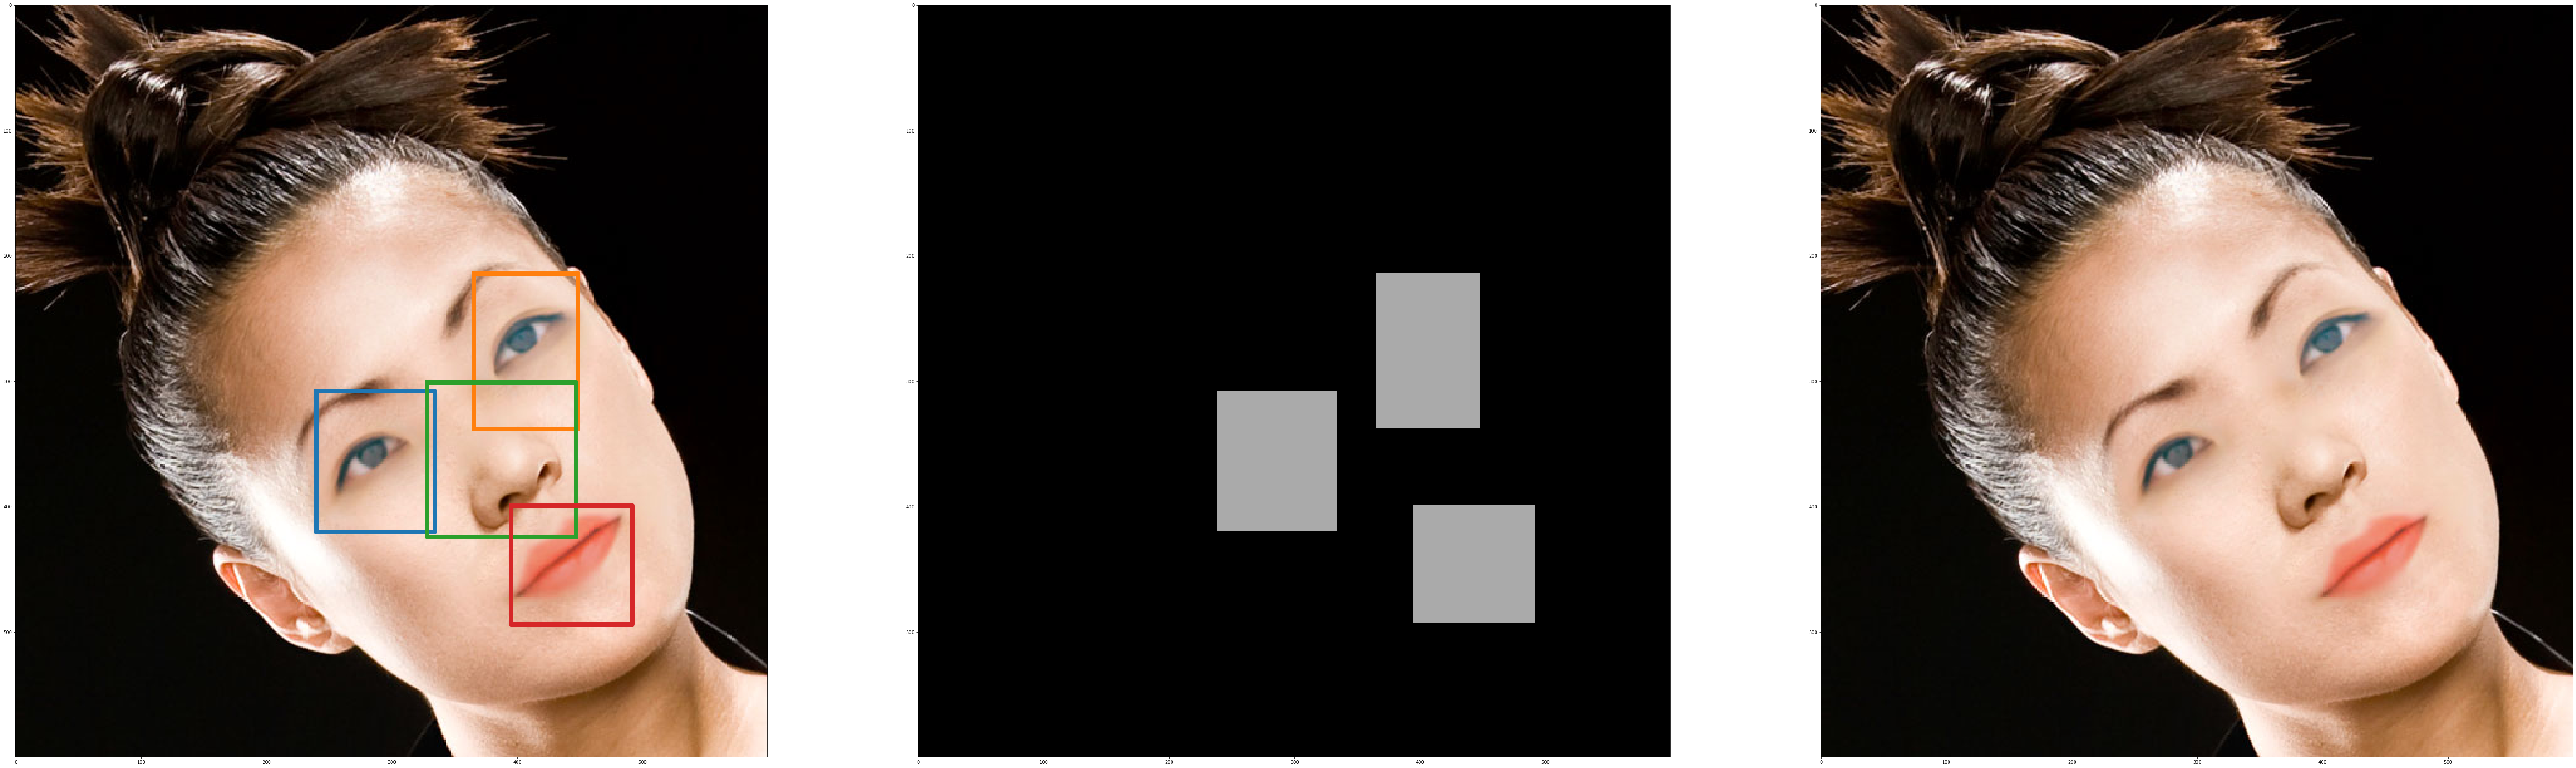

In [77]:
oneImgPipeline(199)

['mid', '360', [1, 1, 0, 0]]

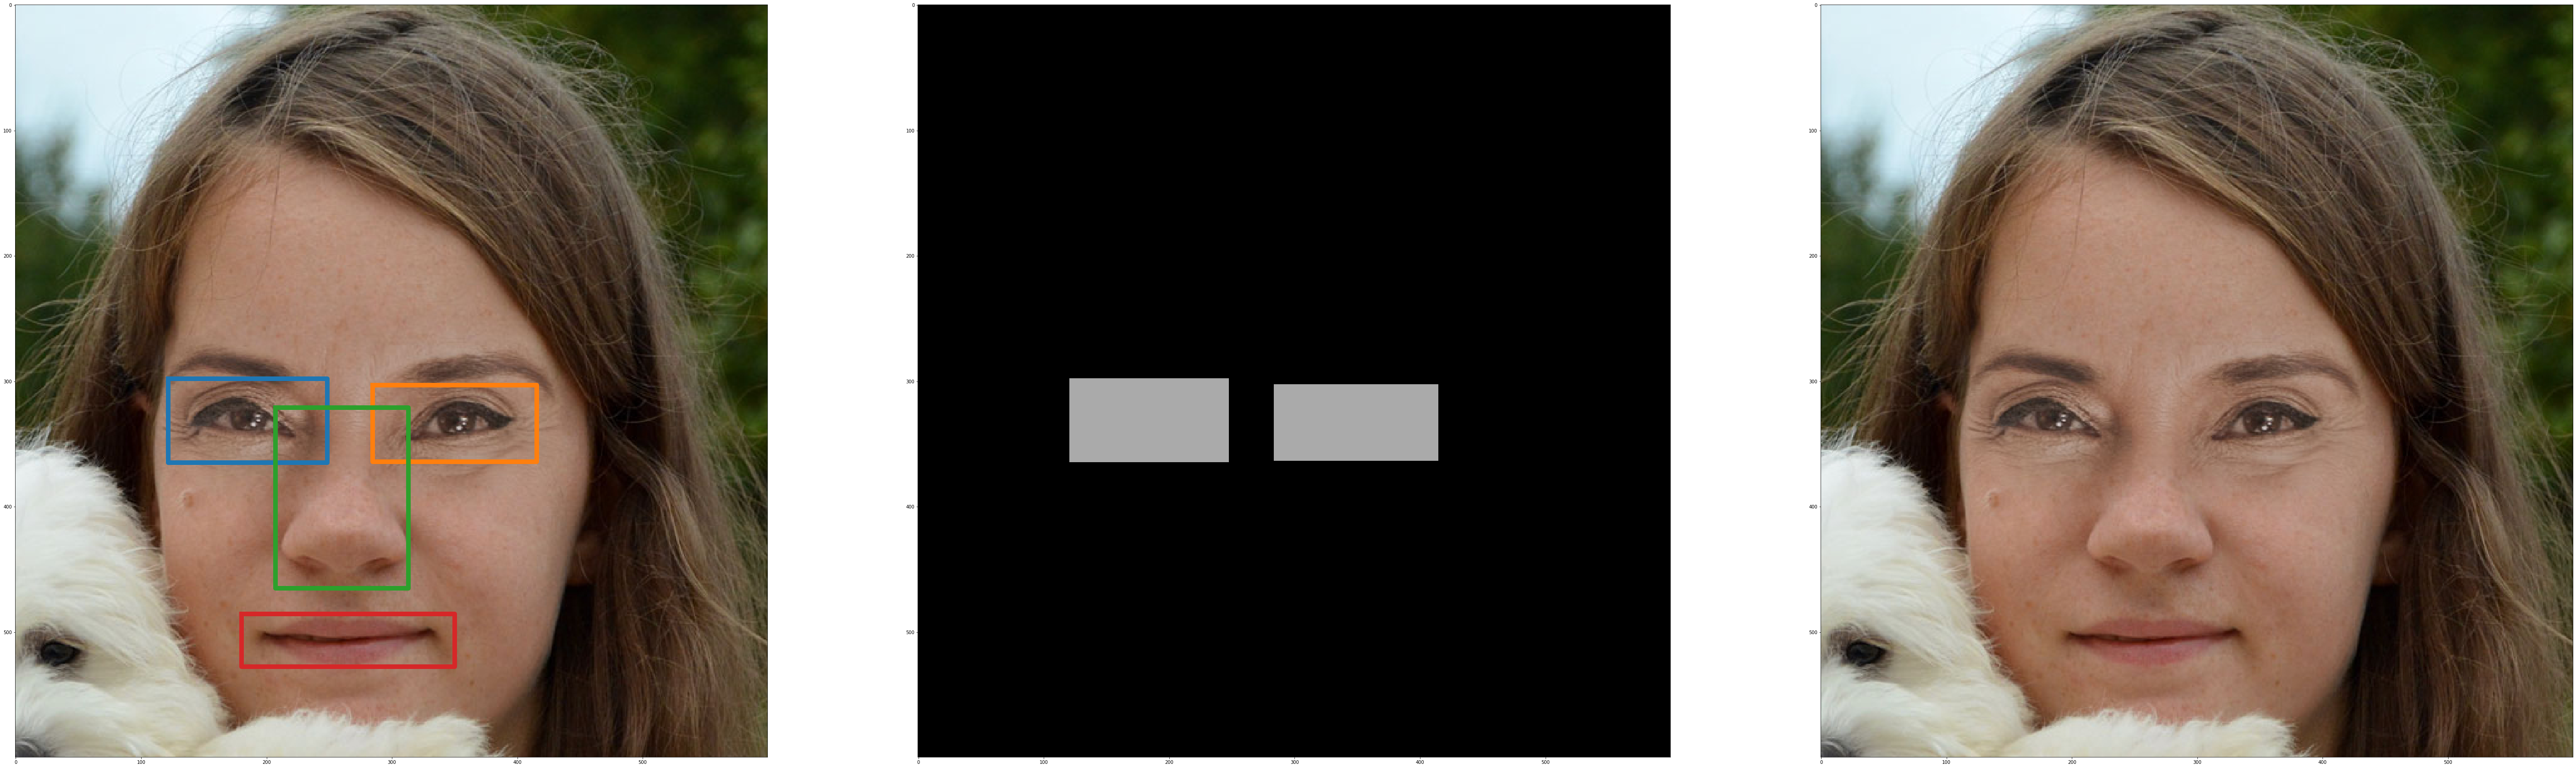

In [76]:
oneImgPipeline(200)

['hard', '67', [0, 0, 0, 1]]

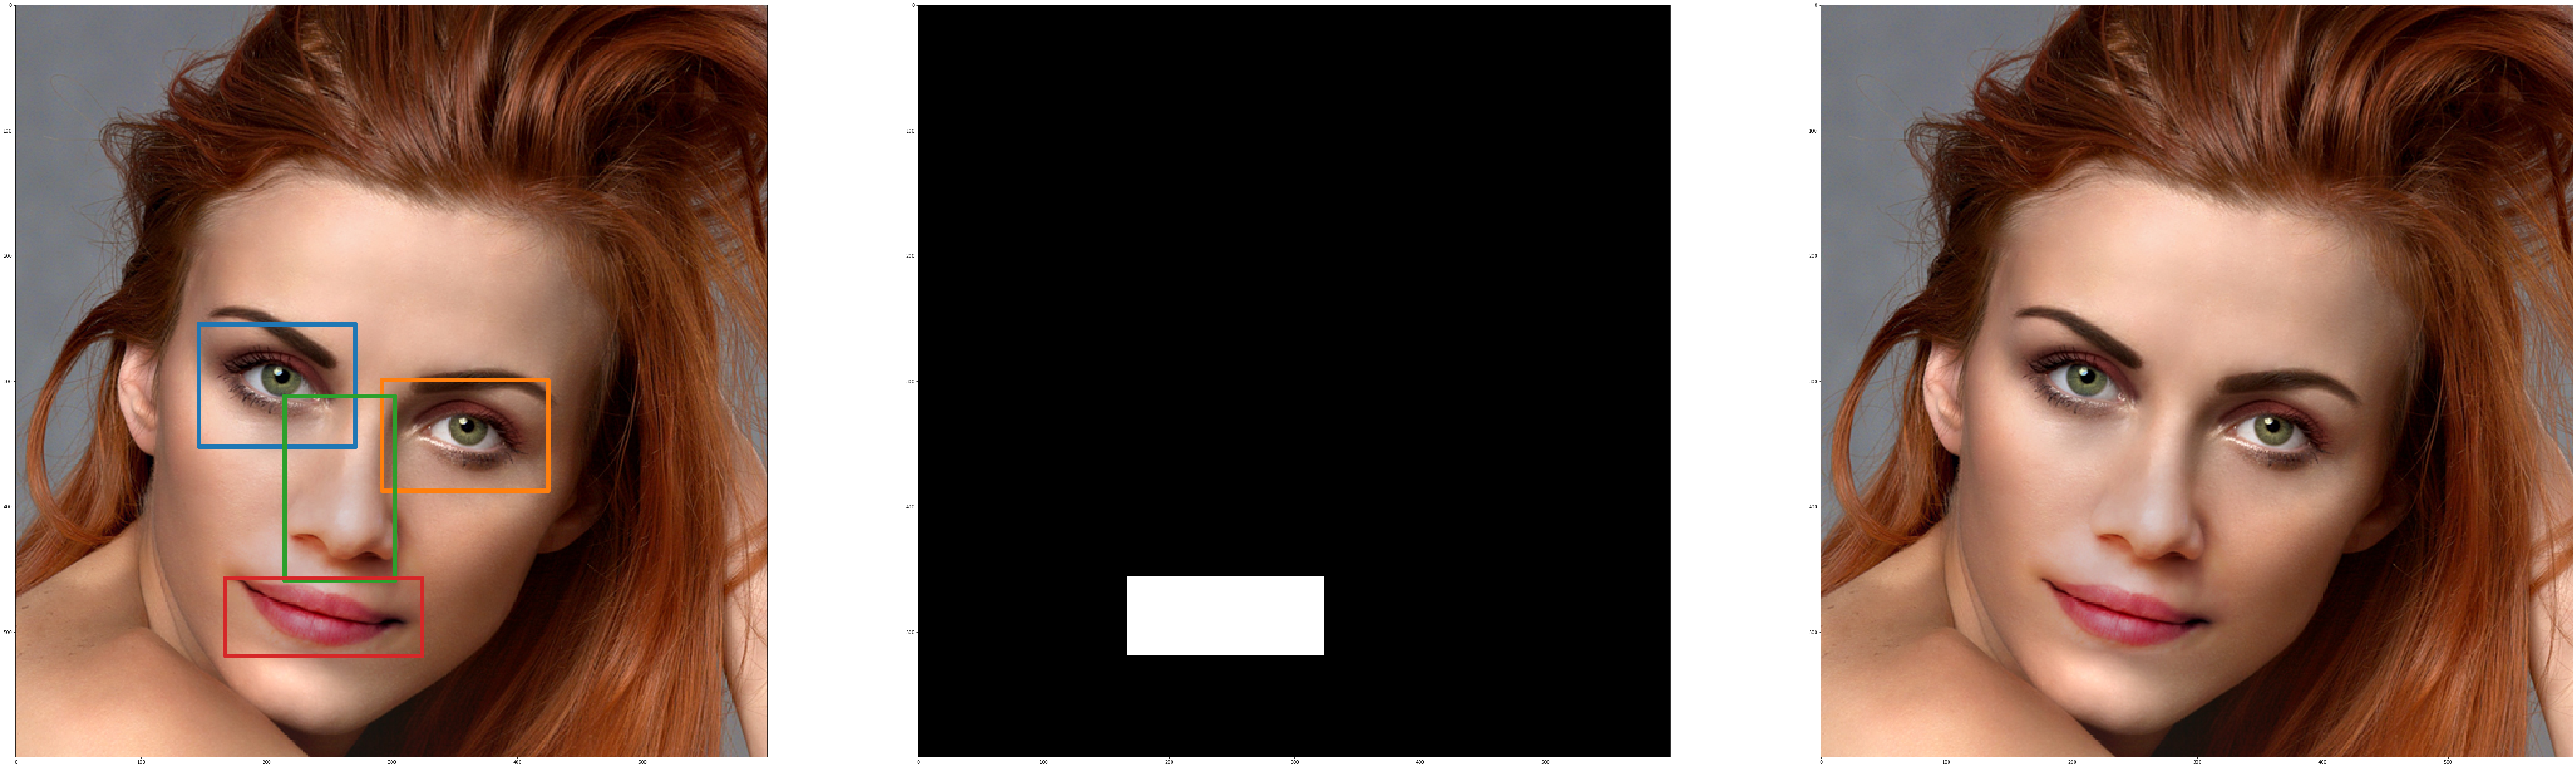

In [73]:
oneImgPipeline(201)

--------------------

#### Some YOLO stuff

In [88]:
# # import the necessary packages
# import numpy as np
# import argparse
# import time
# import cv2
# import os
 
# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
#                 help="path to input image")
# ap.add_argument("-y", "--yolo", required=True,
#                 help="base path to YOLO directory")
# ap.add_argument("-c", "--confidence", type=float, default=0.5,
#                 help="minimum probability to filter weak detections")
# ap.add_argument("-t", "--threshold", type=float, default=0.3,
#                 help="threshold when applying non-maxima suppression")

In [89]:
# args = vars(ap.parse_args())

-----------------------